# Home Price Model Project Part 2

#### Load Packages

In [1]:
import pandas as pd
import numpy as np

#### Read the data 'train.csv'

In [2]:
train_data=pd.read_csv('data/train.csv')

#### Save log of sale price as LogSalePrice

In [14]:
train_data['LogSalePrice']=np.log(train_data['SalePrice'])
train_data['LogSalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: LogSalePrice, Length: 1460, dtype: float64

#### Filter out only categorical variables and add LogSalePrice to the dataframe

In [20]:
cg_train_data=train_data.select_dtypes(include='object')
cg_train_data['LogSalePrice']=train_data['LogSalePrice']
cg_train_data
#这一步是干什么的？

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.247694
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.109011
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.317167
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,11.849398
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.072541
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,12.254863
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,12.493130
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,11.864462


#### List categorical features with missing values, calculate number and percentage of missings

In [22]:
(cg_train_data.isnull().sum()/len(cg_train_data)*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
GarageType        5.547945
GarageQual        5.547945
GarageFinish      5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtQual          2.534247
BsmtCond          2.534247
MasVnrType        0.547945
Electrical        0.068493
PavedDrive        0.000000
SaleType          0.000000
Functional        0.000000
KitchenQual       0.000000
CentralAir        0.000000
HeatingQC         0.000000
Heating           0.000000
SaleCondition     0.000000
MSZoning          0.000000
Street            0.000000
Condition2        0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
Foundation        0.000000
HouseStyle        0.000000
R

#### For categorical variables, replace missing with "None"

In [24]:
cg_train_data.fillna('None',inplace=True)
cg_train_data.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
LogSalePrice     0
dtype: int64

#### List of categorical variables and their value counts

In [26]:
for col in cg_train_data.columns:
    print('*'*50)
    print(cg_train_data[col].value_counts())

**************************************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**************************************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
**************************************************
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
**************************************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**************************************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**************************************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**************************************************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**************************************************
Gtl    1382
Mod      65
Sev      13
Name: 

#### To explore relation between all categorical features and LogSalePrice， let's create boxplots

<AxesSubplot:xlabel='MSZoning', ylabel='LogSalePrice'>

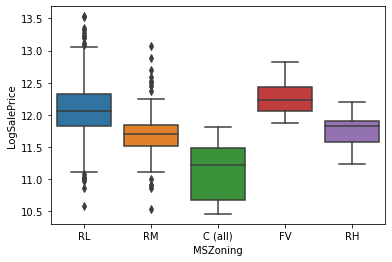

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='MSZoning',y='LogSalePrice',data=cg_train_data)

In [48]:
cols=cg_train_data.columns

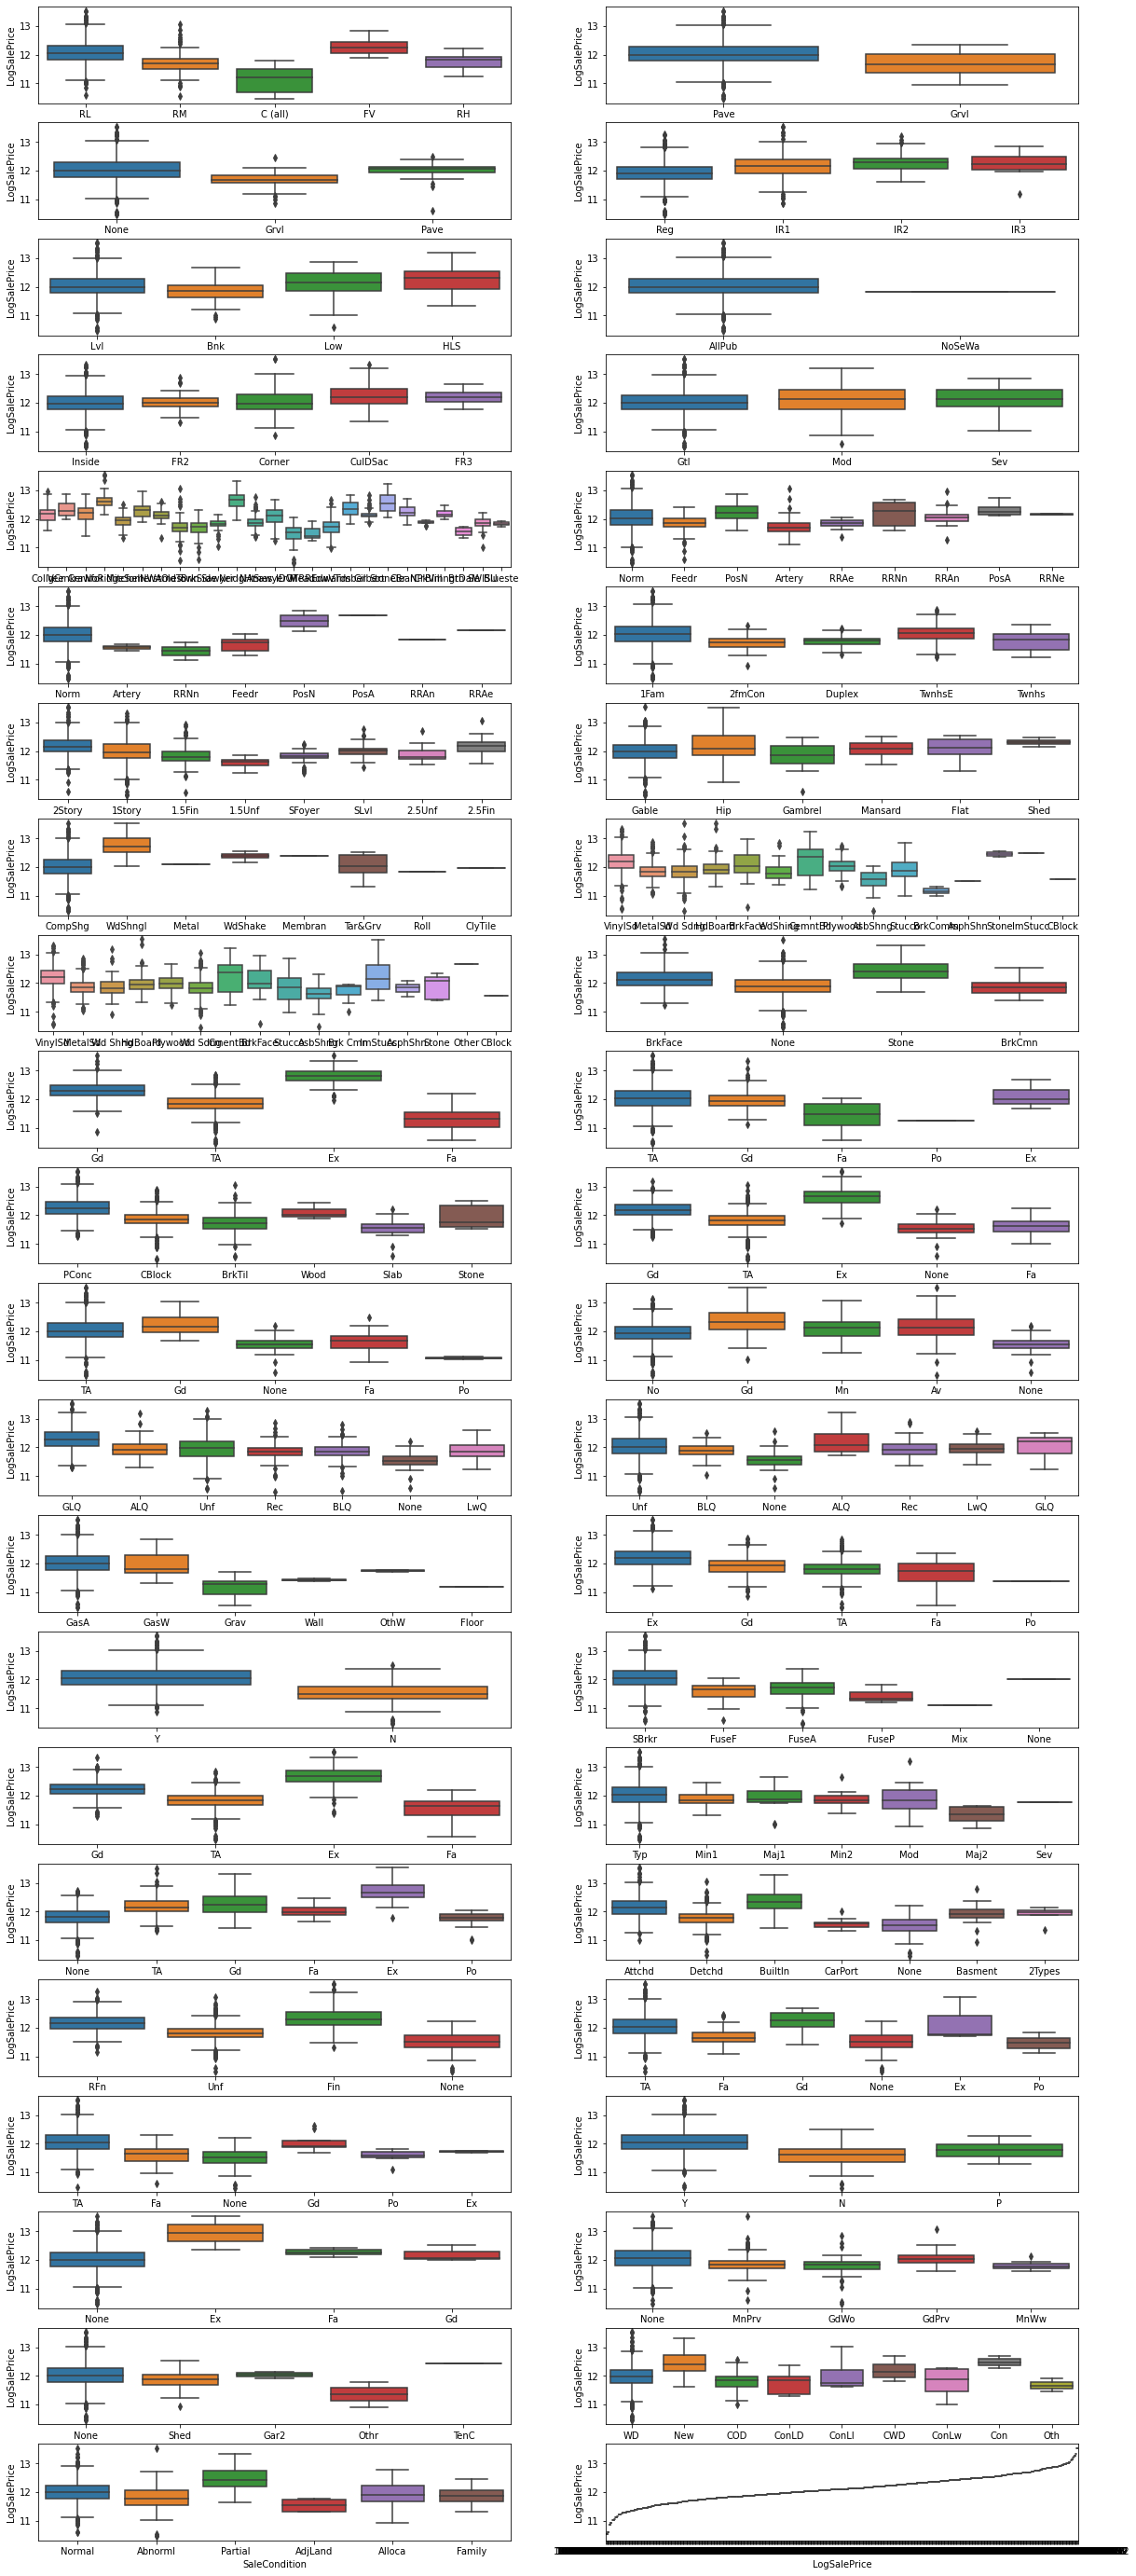

In [58]:
fig,axs= plt.subplots(22,2,figsize=(20,50))

for r in range(22):
    for c in range(2):
        if r*2+c < 44:
            sns.boxplot(x=cols[r*2+c],y='LogSalePrice',data=cg_train_data,ax=axs[r][c])

#### Conclusion from EDA on categorical columns:

In [ ]:
#

#### Which variables are strongly correlated and which are weakly correlated with sale price?

In [ ]:
#Strongly correlated
#Weekly correlated